## Real Estate Property Price Prediction using Linear, ElasticNet, Lasso Regression model

Workflow
1. Loading the Data
2. Data Preprocessing
3. Data Analysis - Train Test split, XGBoost Regressor Evaluation
4. Data Integration

In [1]:
#Import the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.compose import ColumnTransformer


**Load the dataset**

In [2]:
ds= pd.read_csv('Real_Estate_Sales_2001-2020_GL.csv')
ds

C:\Users\Fresh\AppData\Local\Temp\ipykernel_11028\279536047.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  ds= pd.read_csv('Real_Estate_Sales_2001-2020_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.595700,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,6/24/2020,New London,4 BISHOP CT,60410,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
997210,190129,2019,4/27/2020,Windsor Locks,19 HATHAWAY ST,121450,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
997211,190504,2019,6/3/2020,Middletown,8 BYSTREK DR,203360,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN


In [3]:
ds.shape

(997213, 14)

In [4]:
#Check the data for missing values

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  int64  
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 106.5+ MB


In [5]:
ds.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64

#### Data Analysis of Original data

In [6]:
#Let's describe the data
ds.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06


**Visualize the data**

Numerical features

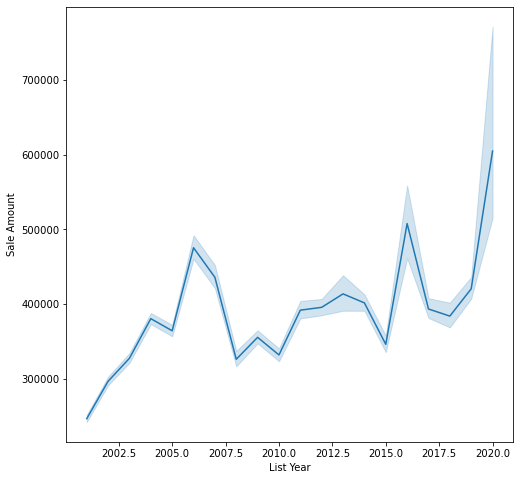

In [7]:
#Plot of the Sale Amount distribution
# Town
plt.figure(figsize=(8,8))

sns.lineplot( x= 'List Year', y='Sale Amount', data= ds)
plt.show()

Comment: The figure shows the sale Amount distribution across each year. The highest sales was recorded in the year 2020 and the lowest in 2001.

C:\Users\Fresh\ANACONDA 2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


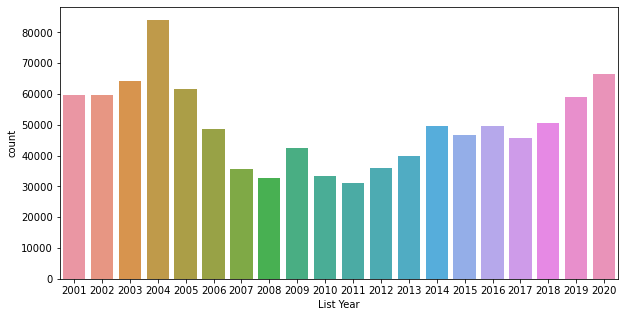

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(ds['List Year'])
plt.show()

Comments: From the original data, the highest patronage was in 2004.

Categorical features

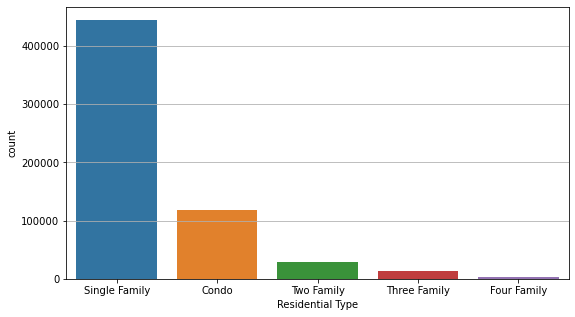

In [9]:
# Residential Type
plt.figure(figsize=(9,5))
sns.countplot(x= 'Residential Type', data= ds)
plt.legend([],frameon=False)
plt.grid(axis='y')


plt.show()

Comments: The single family is the most occuring Residential type in the dataset and the Three family is the least occuring.

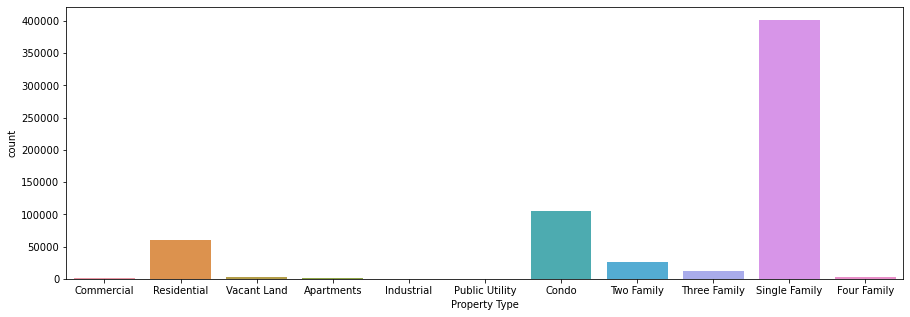

In [10]:
# Property Type
plt.figure(figsize=(15,5))
sns.countplot(x= 'Property Type', data= ds)
plt.show()

The most demanded property type is the "single family".

##### Let's other drop columns we do not need

In [11]:
ds_f=ds.drop(columns=['Serial Number', 'Location','Assessor Remarks','OPM remarks', 'Non Use Code','Date Recorded', 'Address','Sales Ratio', 'List Year'])
ds_f

,Town,Assessed Value,Sale Amount,Property Type,Residential Type
0,Ansonia,150500,325000.0,Commercial,NaN
1,Ashford,253000,430000.0,Residential,Single Family
2,Avon,130400,179900.0,Residential,Condo
3,Avon,619290,890000.0,Residential,Single Family
4,Avon,862330,1447500.0,Residential,Single Family
...,...,...,...,...,...
997208,New London,60410,53100.0,Single Family,Single Family
997209,Waterbury,68280,76000.0,Single Family,Single Family
997210,Windsor Locks,121450,210000.0,Single Family,Single Family
997211,Middletown,203360,280000.0,Single Family,Single Family


#### Data Cleaning

In [12]:
dsc= ds_f.dropna()
dsc

,Town,Assessed Value,Sale Amount,Property Type,Residential Type
1,Ashford,253000,430000.0,Residential,Single Family
2,Avon,130400,179900.0,Residential,Condo
3,Avon,619290,890000.0,Residential,Single Family
4,Avon,862330,1447500.0,Residential,Single Family
5,Avon,847520,1250000.0,Residential,Single Family
...,...,...,...,...,...
997207,Wilton,681870,1134708.0,Single Family,Single Family
997208,New London,60410,53100.0,Single Family,Single Family
997209,Waterbury,68280,76000.0,Single Family,Single Family
997210,Windsor Locks,121450,210000.0,Single Family,Single Family


#### Data Preprocessing

**Split the features and terget**

In [36]:
x= dsc.drop("Sale Amount", axis=1)
y= dsc["Sale Amount"]



**Convert the categorical data into numeric data**

###### Label Encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features=["Town", "Property Type", "Residential Type"]
one_hot= OneHotEncoder()
transformer= ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder= "passthrough")

transformeed_x = transformer.fit_transform(dsc)
transformeed_x





<608904x183 sparse matrix of type '<class 'numpy.float64'>'
	with 3042403 stored elements in Compressed Sparse Row format>

In [15]:
pd.DataFrame(transformeed_x)




,0
0,"(0, 3)\t1.0\n (0, 172)\t1.0\n (0, 178)\t1...."
1,"(0, 4)\t1.0\n (0, 172)\t1.0\n (0, 176)\t1...."
2,"(0, 4)\t1.0\n (0, 172)\t1.0\n (0, 178)\t1...."
3,"(0, 4)\t1.0\n (0, 172)\t1.0\n (0, 178)\t1...."
4,"(0, 4)\t1.0\n (0, 172)\t1.0\n (0, 178)\t1...."
...,...
608899,"(0, 161)\t1.0\n (0, 173)\t1.0\n (0, 178)\t..."
608900,"(0, 94)\t1.0\n (0, 173)\t1.0\n (0, 178)\t1..."
608901,"(0, 151)\t1.0\n (0, 173)\t1.0\n (0, 178)\t..."
608902,"(0, 165)\t1.0\n (0, 173)\t1.0\n (0, 178)\t..."


In [16]:
dummies= pd.get_dummies(dsc[["Town", "Property Type", "Residential Type"]])
dummies

,Town_***Unknown***,Town_Andover,Town_Ansonia,Town_Ashford,Town_Avon,Town_Barkhamsted,Town_Beacon Falls,Town_Berlin,Town_Bethany,Town_Bethel,...,Property Type_Four Family,Property Type_Residential,Property Type_Single Family,Property Type_Three Family,Property Type_Two Family,Residential Type_Condo,Residential Type_Four Family,Residential Type_Single Family,Residential Type_Three Family,Residential Type_Two Family
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997207,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
997208,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
997209,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
997210,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [17]:
#Convert the sparse matrix to a dense matrix
x=transformeed_x.todense()
x


matrix([[     0.,      0.,      0., ...,      0., 253000., 430000.],
        [     0.,      0.,      0., ...,      0., 130400., 179900.],
        [     0.,      0.,      0., ...,      0., 619290., 890000.],
        ...,
        [     0.,      0.,      0., ...,      0.,  68280.,  76000.],
        [     0.,      0.,      0., ...,      0., 121450., 210000.],
        [     0.,      0.,      0., ...,      0., 203360., 280000.]])

In [18]:
#Put it back into a dataframe
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,253000.0,430000.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,130400.0,179900.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,619290.0,890000.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,862330.0,1447500.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,847520.0,1250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,681870.0,1134708.0
608900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60410.0,53100.0
608901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,68280.0,76000.0
608902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,121450.0,210000.0


**Split data into Training and Testing data**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=5)

In [21]:
print(x.shape, x_train.shape, x_test.shape)

(608904, 183) (487123, 183) (121781, 183)


#### Building the Machine learning model

In [22]:
model_Lin= LinearRegression()
model_las= Lasso()
model_Elas= ElasticNet()

In [23]:

#Fit the model
model_Lin.fit(x_train, y_train)
model_las.fit(x_train, y_train)
model_Elas.fit(x_train, y_train)

ElasticNet()

#### Evaluation

In [24]:
training_data_prediction1= model_Lin.predict(x_train)
training_data_prediction2= model_las.predict(x_train)
training_data_prediction3= model_Elas.predict(x_train)

In [25]:
#R-Squared value on the trained data

r2_train1= metrics.r2_score(y_train, training_data_prediction1)
print('R-squared value for Lin =', r2_train1)
r2_train2= metrics.r2_score(y_train, training_data_prediction2)
print('R-squared value for Lasso =', r2_train2)
r2_train3= metrics.r2_score(y_train, training_data_prediction3)
print('R-squared value for ElasticNet =', r2_train3)

R-squared value for Lin = 1.0
R-squared value for Lasso = 1.0
R-squared value for ElasticNet = 1.0


In [26]:
# Predicting for test data

test_data_prediction1= model_Lin.predict(x_test)
test_data_prediction2= model_las.predict(x_test)
test_data_prediction3= model_Elas.predict(x_test)

r2_test1= metrics.r2_score(y_test, test_data_prediction1)
print('R-squared value for test (LinearRegression) =', r2_test1)
r2_test2= metrics.r2_score(y_test, test_data_prediction2)
print('R-squared value for test(Lasso) =', r2_test2)
r2_test3= metrics.r2_score(y_test, test_data_prediction3)
print('R-squared value for test(ElasticNet) =', r2_test3)

R-squared value for test (LinearRegression) = 1.0
R-squared value for test(Lasso) = 1.0
R-squared value for test(ElasticNet) = 1.0


**MAE**

In [27]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
y_preds_lin=model_Lin.predict(x_test)
y_preds_las=model_las.predict(x_test)
y_preds_Elas=model_Elas.predict(x_test)

mae_lin=mean_absolute_error(y_test, y_preds_lin)
mae_las=mean_absolute_error(y_test, y_preds_las)
mae_Elas=mean_absolute_error(y_test, y_preds_Elas)

print('Mean Absolute Error for LinearRegression =',mae_lin)
print('Mean Absolute Error for Lasso =',mae_las)
print('Mean Absolute Error for ElasticNet =',mae_Elas)

Mean Absolute Error for LinearRegression = 1.0517380037733931e-09
Mean Absolute Error for Lasso = 7.774481940420548e-06
Mean Absolute Error for ElasticNet = 2.631726224975289e-07


In [28]:
df_lin= pd.DataFrame(data={"actual values": y_test, "predicted values":y_preds_lin})

df_lin
#Let's display the differences
df_lin["differences"]=df_lin["predicted values"] - df_lin["actual values"]
df_lin

,actual values,predicted values,differences
737361,300000.0,300000.0,1.338776e-09
619097,152000.0,152000.0,1.018634e-09
46388,295000.0,295000.0,-1.629815e-09
655953,375000.0,375000.0,-1.164153e-10
727698,195000.0,195000.0,8.440111e-10
...,...,...,...
756501,487000.0,487000.0,-8.149073e-10
388308,321900.0,321900.0,6.228220e-09
908514,245000.0,245000.0,4.656613e-10
578984,207575.0,207575.0,2.357410e-09


In [29]:
df_las= pd.DataFrame(data={"actual values": y_test, "predicted values":y_preds_las})

df_las
#Let's display the differences
df_las["differences"]=df_las["predicted values"] - df_las["actual values"]
df_las

,actual values,predicted values,differences
737361,300000.0,299999.999996,-3.595022e-06
619097,152000.0,151999.999995,-4.922913e-06
46388,295000.0,294999.999999,-1.479755e-06
655953,375000.0,375000.000000,-4.128669e-07
727698,195000.0,194999.999994,-6.153015e-06
...,...,...,...
756501,487000.0,487000.000004,4.293572e-06
388308,321900.0,321899.999994,-6.181479e-06
908514,245000.0,244999.999994,-5.510374e-06
578984,207575.0,207574.999996,-4.145317e-06


In [30]:
df_Elas= pd.DataFrame(data={"actual values": y_test, "predicted values":y_preds_Elas})

df_Elas
#Let's display the differences
df_Elas["differences"]=df_Elas["predicted values"] - df_Elas["actual values"]
df_Elas

,actual values,predicted values,differences
737361,300000.0,300000.0,6.519258e-08
619097,152000.0,152000.0,2.189481e-07
46388,295000.0,295000.0,7.043127e-08
655953,375000.0,375000.0,-1.268927e-08
727698,195000.0,195000.0,1.742737e-07
...,...,...,...
756501,487000.0,487000.0,-1.290464e-07
388308,321900.0,321900.0,4.249159e-08
908514,245000.0,245000.0,1.223525e-07
578984,207575.0,207575.0,1.612352e-07


**MSE**

In [31]:
#mean squared error for linearRegression model
from sklearn.metrics import mean_squared_error
y_preds_lin=model_Lin.predict(x_test)
mse_lin= mean_squared_error(y_test, y_preds_lin)
print('mse_lin=',mse_lin)


mse_lin= 7.952591977661625e-18


In [32]:
#mean squared error for lasso model
from sklearn.metrics import mean_squared_error
y_preds_las=model_las.predict(x_test)
mse_las= mean_squared_error(y_test, y_preds_las)
print('mse_las=',mse_las)


mse_las= 1.777309063256451e-09


In [33]:
#mean squared error for ElasticNet
from sklearn.metrics import mean_squared_error
y_preds_Elas=model_Elas.predict(x_test)
mse_Elas= mean_squared_error(y_test, y_preds_Elas)
print('mse_Elas=',mse_Elas)

mse_Elas= 6.249116131627376e-13


**Saving and Loading the model**

In [34]:
#Save the model
model_Lin=LinearRegression()
model_Lin.fit(x_test, y_preds_lin)
import pickle

#save an existing model to file
pickle.dump(model_Lin, open("Real Estate Price prediction_pk1","wb"))

In [35]:
#Load the model
loaded_pickle_model = pickle.load(open("Real Estate Price prediction_pk1","rb"))